In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '../data/raw/Food_Delivery_Times.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
print(df.shape)
df.head()

(1000, 9)


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


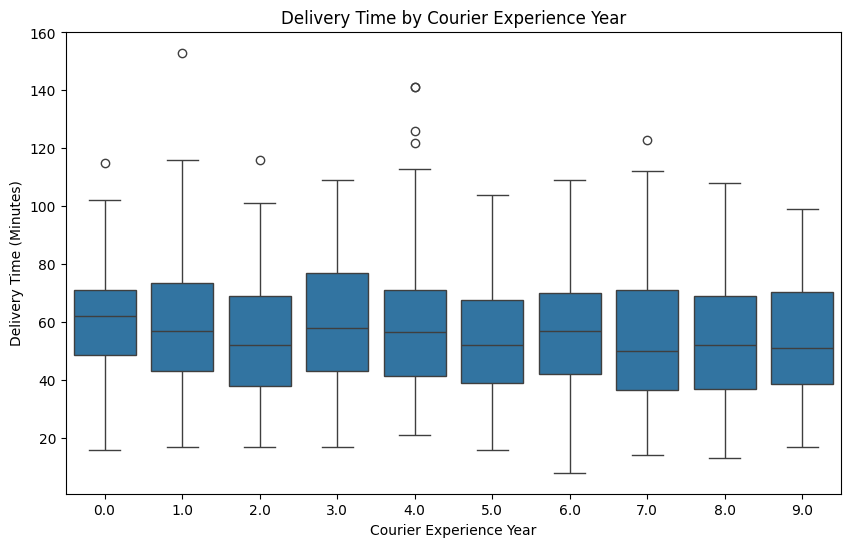

In [5]:
# histogram to visualize the distribution of Delivery_Time_Min via Vehicle_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Courier_Experience_yrs', y='Delivery_Time_min', data=df)
plt.title('Delivery Time by Courier Experience Year')
plt.xlabel('Courier Experience Year')
plt.ylabel('Delivery Time (Minutes)')
plt.show()

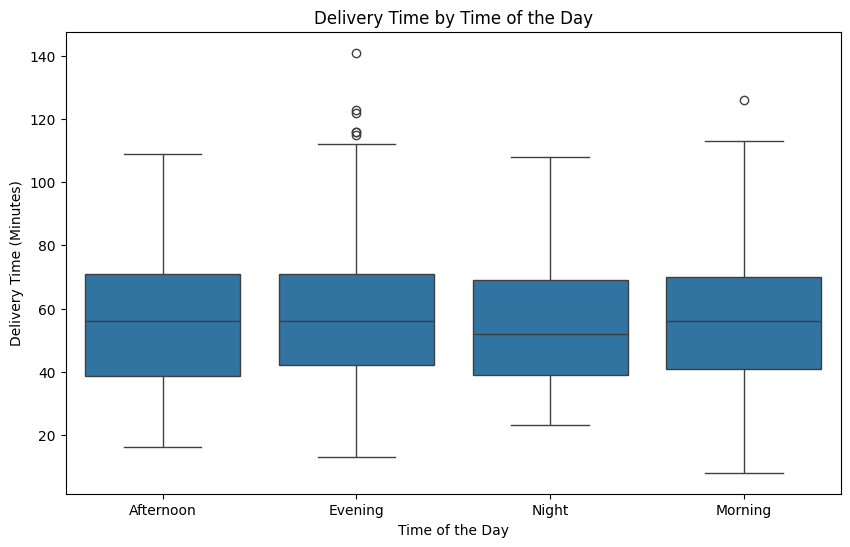

In [6]:
# histogram to visualize the distribution of Delivery_Time_Min via Vehicle_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time_of_Day', y='Delivery_Time_min', data=df)
plt.title('Delivery Time by Time of the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Delivery Time (Minutes)')
plt.show()

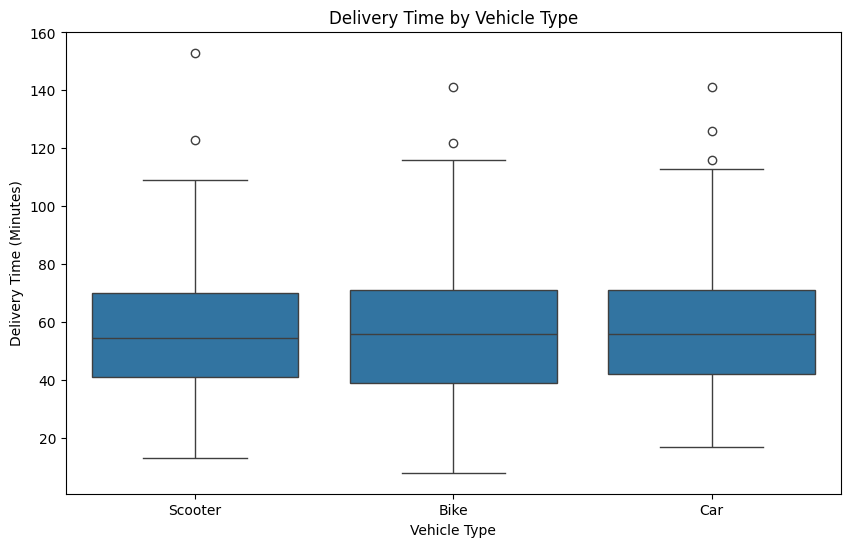

In [9]:
# histogram to visualize the distribution of Delivery_Time_Min via Vehicle_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle_Type', y='Delivery_Time_min', data=df)
plt.title('Delivery Time by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Delivery Time (Minutes)')
plt.show()

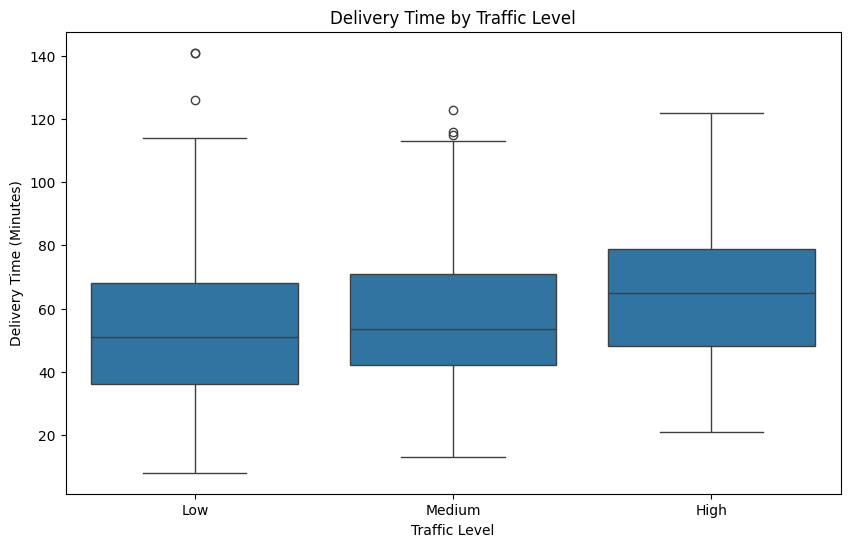

In [7]:
# histogram to visualize the distribution of Delivery_Time_Min via Vehicle_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Traffic_Level', y='Delivery_Time_min', data=df)
plt.title('Delivery Time by Traffic Level')
plt.xlabel('Traffic Level')
plt.ylabel('Delivery Time (Minutes)')
plt.show()

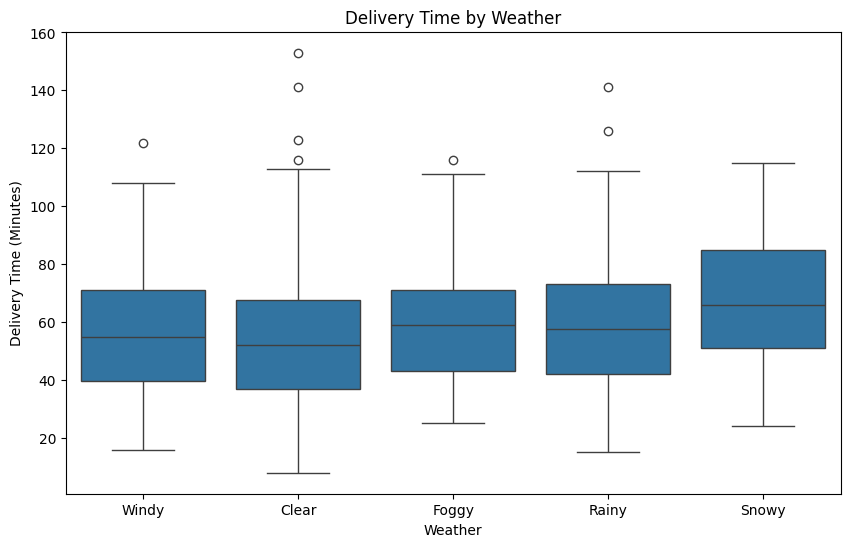

In [8]:
# histogram to visualize the distribution of Delivery_Time_Min via Vehicle_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather', y='Delivery_Time_min', data=df)
plt.title('Delivery Time by Weather')
plt.xlabel('Weather')
plt.ylabel('Delivery Time (Minutes)')
plt.show()

In [9]:
df.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [10]:
# Selecting the  numeric columns for univariate analysis
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [14]:
print("\nDescriptive statistics (numeric):\n")
print(df[numeric_cols].describe().T)


Descriptive statistics (numeric):

                         count        mean         std   min      25%     50%  \
Order_ID                1000.0  500.500000  288.819436  1.00  250.750  500.50   
Distance_km             1000.0   10.059970    5.696656  0.59    5.105   10.19   
Preparation_Time_min    1000.0   16.982000    7.204553  5.00   11.000   17.00   
Courier_Experience_yrs   970.0    4.579381    2.914394  0.00    2.000    5.00   
Delivery_Time_min       1000.0   56.732000   22.070915  8.00   41.000   55.50   

                             75%      max  
Order_ID                750.2500  1000.00  
Distance_km              15.0175    19.99  
Preparation_Time_min     23.0000    29.00  
Courier_Experience_yrs    7.0000     9.00  
Delivery_Time_min        71.0000   153.00  


/tmp/ipykernel_3992/2984565515.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


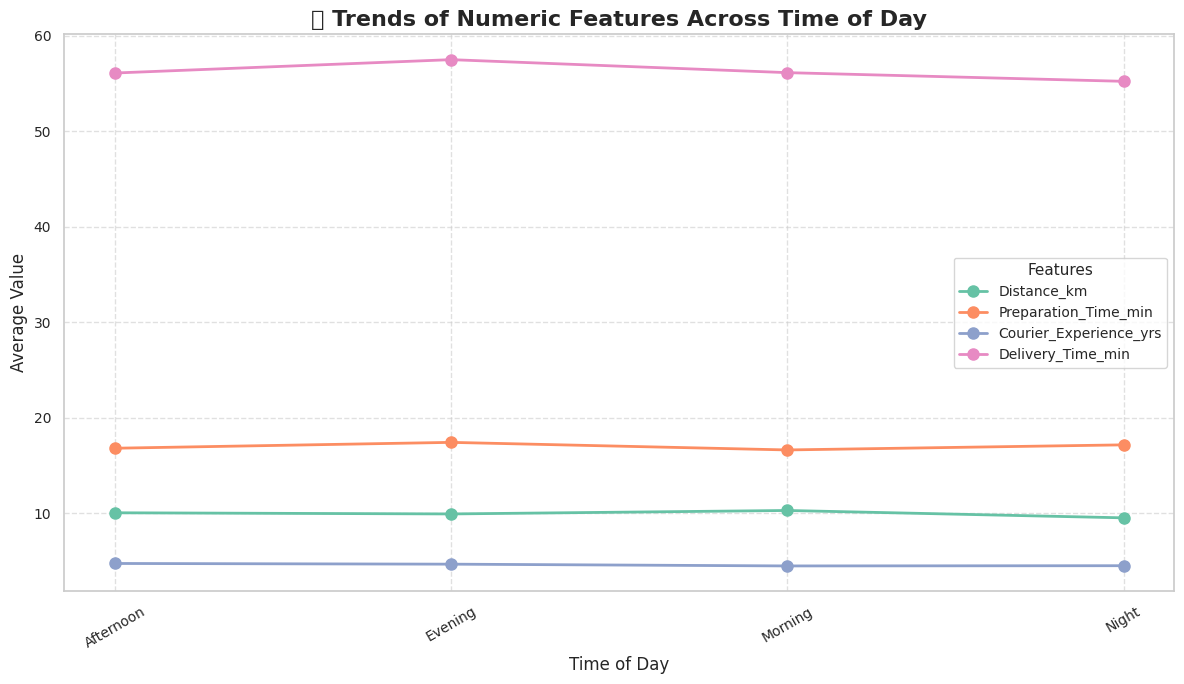

In [15]:
sns.set_theme(style="whitegrid")

numeric_cols = ["Distance_km", "Preparation_Time_min", "Courier_Experience_yrs", "Delivery_Time_min"]
time_trends = df.groupby("Time_of_Day")[numeric_cols].mean()

plt.figure(figsize=(12, 7))
palette = sns.color_palette("Set2", len(numeric_cols))

for i, col in enumerate(numeric_cols):
    plt.plot(time_trends.index, time_trends[col], marker="o", markersize=8,
             linewidth=2, color=palette[i], label=col)

plt.title("📊 Trends of Numeric Features Across Time of Day", fontsize=16, fontweight="bold")
plt.xlabel("Time of Day", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.legend(title="Features", fontsize=10, title_fontsize=11, loc="best", frameon=True)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


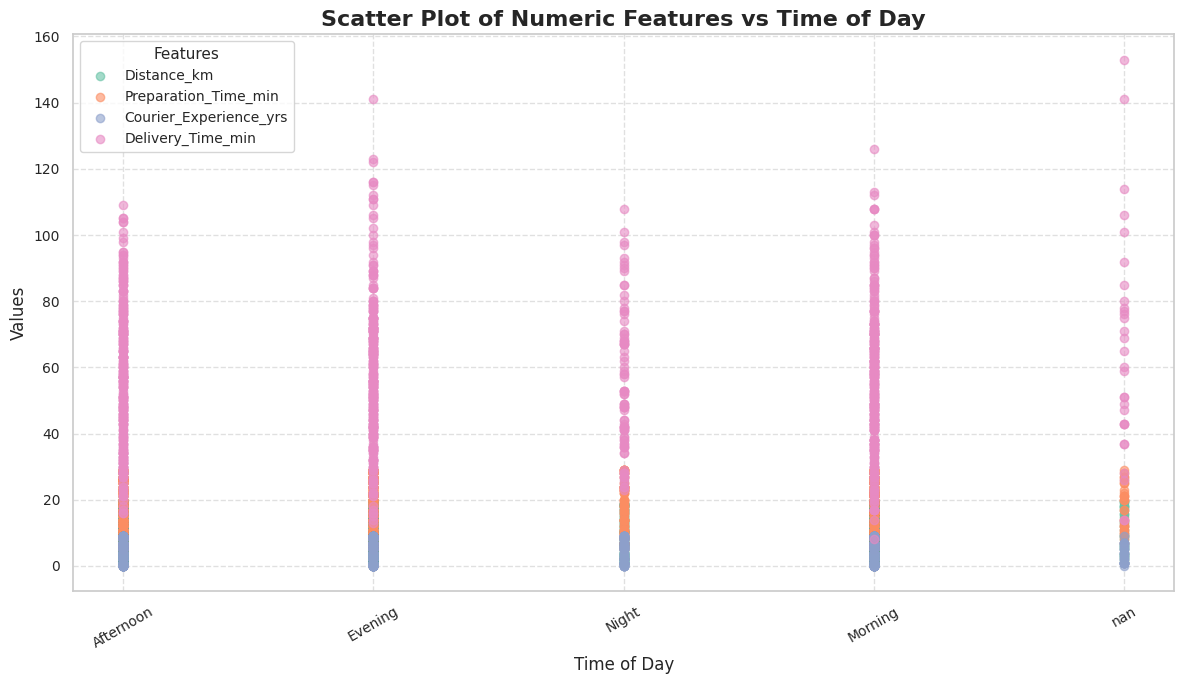

In [16]:

sns.set_theme(style="whitegrid")

df['Time_of_Day'] = df['Time_of_Day'].astype(str)

numeric_cols = ["Distance_km", "Preparation_Time_min", "Courier_Experience_yrs", "Delivery_Time_min"]
palette = sns.color_palette("Set2", len(numeric_cols))

plt.figure(figsize=(12, 7))

for i, col in enumerate(numeric_cols):
    plt.scatter(df["Time_of_Day"], df[col], color=palette[i], alpha=0.6, label=col)

plt.title("Scatter Plot of Numeric Features vs Time of Day", fontsize=16, fontweight="bold")
plt.xlabel("Time of Day", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.legend(title="Features", fontsize=10, title_fontsize=11, loc="best", frameon=True)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


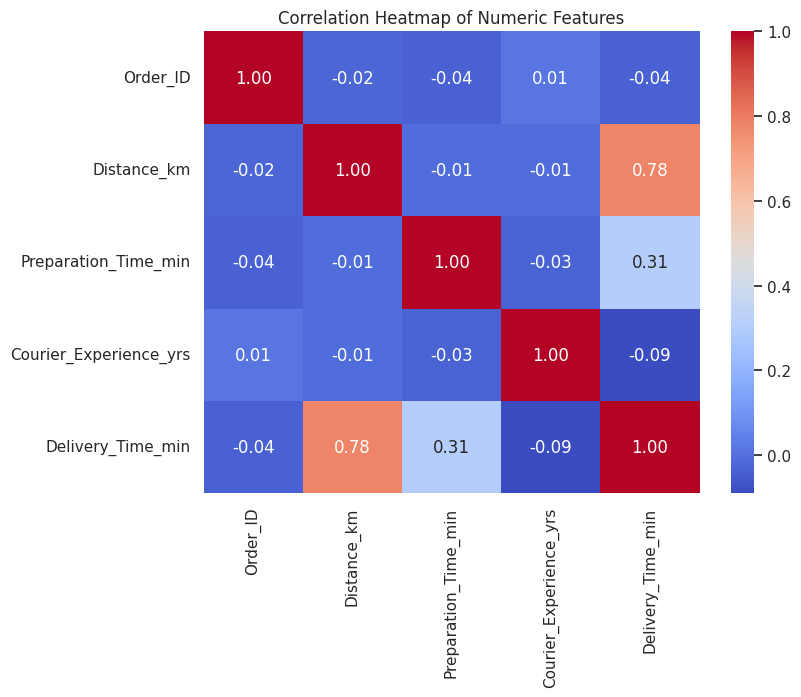

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

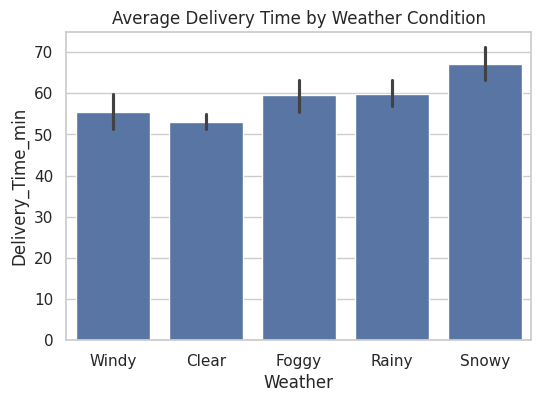

In [18]:
plt.figure(figsize=(6,4))
sns.barplot(x="Weather", y="Delivery_Time_min", data=df)
plt.title("Average Delivery Time by Weather Condition")
plt.show()

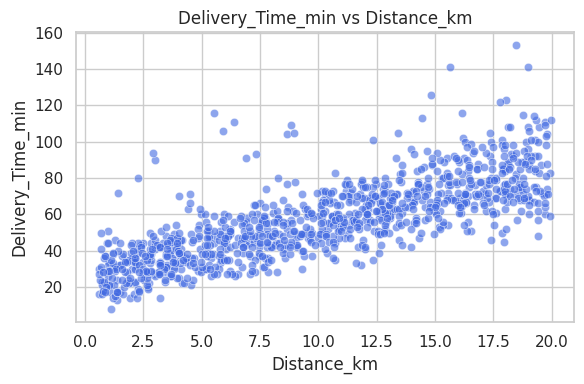

/tmp/ipykernel_3992/2637285873.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target, data=df, estimator="mean", ci=None, palette="Set2")
/tmp/ipykernel_3992/2637285873.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=df, estimator="mean", ci=None, palette="Set2")


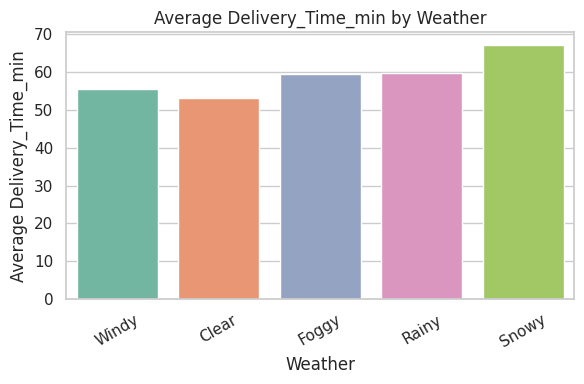

/tmp/ipykernel_3992/2637285873.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target, data=df, estimator="mean", ci=None, palette="Set2")
/tmp/ipykernel_3992/2637285873.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=df, estimator="mean", ci=None, palette="Set2")


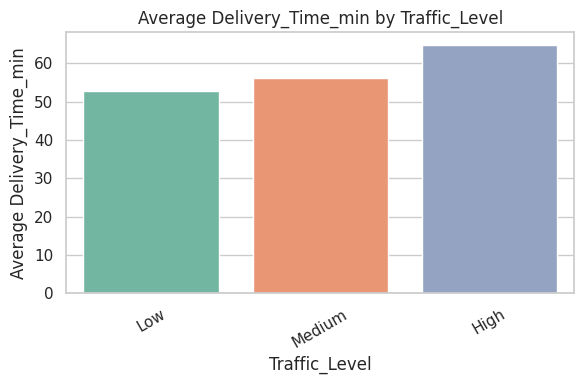

/tmp/ipykernel_3992/2637285873.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target, data=df, estimator="mean", ci=None, palette="Set2")
/tmp/ipykernel_3992/2637285873.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=df, estimator="mean", ci=None, palette="Set2")


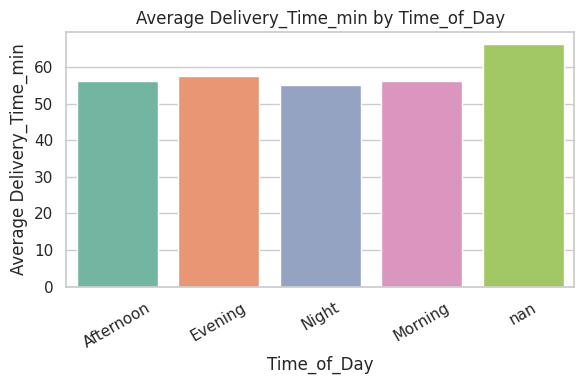

/tmp/ipykernel_3992/2637285873.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target, data=df, estimator="mean", ci=None, palette="Set2")
/tmp/ipykernel_3992/2637285873.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=df, estimator="mean", ci=None, palette="Set2")


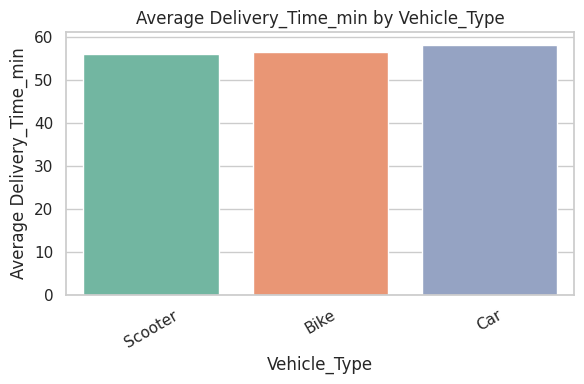

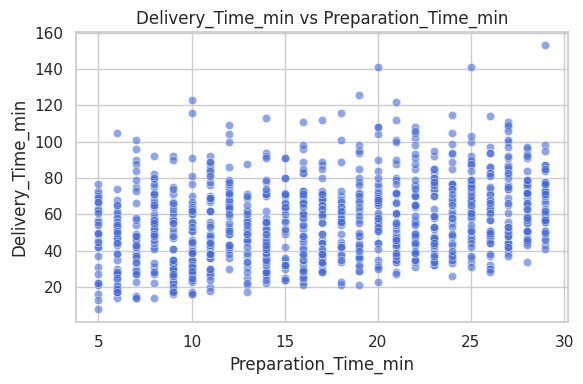

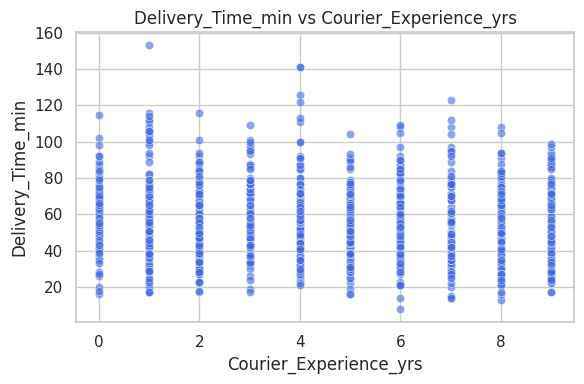

In [19]:
target = "Delivery_Time_min"
cols = ["Distance_km", "Weather", "Traffic_Level", "Time_of_Day",
        "Vehicle_Type", "Preparation_Time_min", "Courier_Experience_yrs"]

for col in cols:
    plt.figure(figsize=(6,4))

    if df[col].dtype == "object":  # categorical
        sns.barplot(x=col, y=target, data=df, estimator="mean", ci=None, palette="Set2")
        plt.title(f"Average {target} by {col}")
        plt.xlabel(col)
        plt.ylabel(f"Average {target}")
        plt.xticks(rotation=30)

    else:  # numeric
        sns.scatterplot(x=col, y=target, data=df, color="royalblue", alpha=0.6)
        plt.title(f"{target} vs {col}")
        plt.xlabel(col)
        plt.ylabel(target)

    plt.tight_layout()
    plt.show()


In [20]:

# ignore this part
outlier_summary = {}
for col in numeric_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  low = Q1 - 1.5 * IQR
  high = Q3 + 1.5 * IQR
  outliers = df[(df[col] < low) | (df[col] > high)]
  outlier_summary[col] = {"count": len(outliers), "percent": 100 * len(outliers) / len(df)}
print("\nOutlier summary (IQR method):")
print(pd.DataFrame(outlier_summary).T)



Outlier summary (IQR method):
                        count  percent
Distance_km               0.0      0.0
Preparation_Time_min      0.0      0.0
Courier_Experience_yrs    0.0      0.0
Delivery_Time_min         6.0      0.6
